In [25]:
from astropy.io import fits
import pandas as pd

# Read fits files
# file_path = 'final_matched_highz_catalogue.fits'  # the fits table from the outcome of the scripts
# with fits.open(file_path) as hdul:
#     data = hdul[1].data  # 
#     df = pd.DataFrame(data)  # to Pandas DataFrame
data_path = '../final_matched_highz_catalogue.csv'  # the output csv file
df=pd.read_csv(data_path, encoding='gbk')  # read the csv file
# check the columns and first few rows
print(df.columns)
print(df.head())

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_class', 'sdss_z',
       'sdss_source_z', 'sdss_zwarning', 'z_reliable_flag', 'FIRST',
       'source_tier_first', 'Fpeak_first', 'Fint_first', 'Rms_first', 'NVSS',
       'source_tier_nvss', 'S1.4_nvss', 'e_S1.4_nvss', 'GLEAM',
       'source_tier_gleam', 'Fpwide_gleam', 'e_Fpwide_gleam', 'Fintwide_gleam',
       'e_Fintwide_gleam', 'RACS-DR1', 'source_tier_racs', 'Fpk_racs',
       'e_Fpk_racs', 'Ftot_racs', 'e_Ftot_racs', 'source_tier_flag'],
      dtype='object')
            sdss_name     sdss_ra   sdss_dec sdss_class  sdss_z sdss_source_z  \
0  102651.46+590628.0  156.714441  59.107796        QSO   3.407            VI   
1  100025.33+590459.6  150.105554  59.083246        QSO   3.502            VI   
2  102032.50+585849.2  155.135452  58.980348        QSO   3.421            VI   
3  111014.02+585744.1  167.558426  58.962254        QSO   3.102            VI   
4  130204.52+585353.9  195.518857  58.898307        QSO   3.281          P

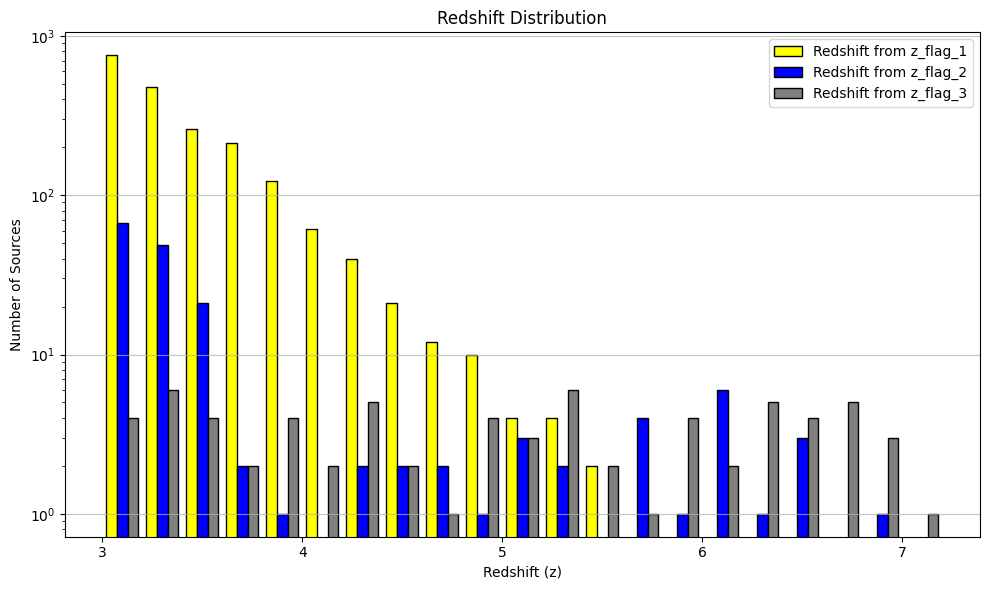

In [26]:
from matplotlib import pyplot as plt

#draw the hitogram figure for redshift distribution
plt.figure(figsize=(10, 6))
# start from z= 3 and ends at z= 7.2, bin width is 0.2
z_flag_1 = df[df['z_reliable_flag'] == 1]['sdss_z']
z_flag_2 = df[df['z_reliable_flag'] == 2]['sdss_z']
z_flag_3 = df[df['z_reliable_flag'] == 3]['sdss_z']
z_all = df['sdss_z']

plt.hist([z_flag_1, z_flag_2, z_flag_3], bins=21, range=(3, 7.2),
         stacked=False,
         edgecolor='black',
         color=['yellow', 'blue', 'grey'],
         label=['Redshift from z_flag_1', 'Redshift from z_flag_2', 'Redshift from z_flag_3'])
#bin_edges = np.linspace(3, 7.2, 22); width = 0.2
# plt.hist(df['sdss_z'], bins=21, range=(3, 7.2), color='blue', edgecolor='black')
# plt.hist(z_flag_3, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='grey', label='Redshift from z_flag_3', rwidth=0.9)
# plt.hist(z_flag_2, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='blue', label='Redshift from z_flag_2', rwidth=0.9, 
#          histtype='bar', bottom=None)
# plt.hist(z_flag_1, bins=bin_edges, alpha=0.9, width=width/3, align='mid', color='yellow', label='Redshift from z_flag_1', rwidth=0.9, 
#          histtype='bar', bottom=None)
# # add another histogram for only sdss_source_z != PIPE
# plt.hist(df[df['sdss_source_z'] != 'PIPE']['sdss_z'], bins=21, range=(3, 7.2), color='yellow', alpha=0.5, edgecolor='white')
plt.legend(loc='upper right')
plt.title('Redshift Distribution')
plt.xlabel('Redshift (z)')
plt.ylabel('Number of Sources')
plt.grid(axis='y', alpha=0.75)
# using log scale for y-axis
plt.yscale('log')
plt.tight_layout()
plt.savefig('redshift_distribution.pdf', format='pdf',  dpi=300)
plt.show()

In [27]:
# show the numbers of every redshift range
# z>3 is 1515
# check z>4 
print("Number of sources with z >= 3:", len(df[df['sdss_z'] >= 3]))
# check z>4
print("Number of sources with z >= 4:", len(df[df['sdss_z'] >= 4]))
# check z>5
print("Number of sources with z >= 5:", len(df[df['sdss_z'] >= 5]))
# check z>6
print("Number of sources with z >= 6:", len(df[df['sdss_z'] >= 6]))
# check z>7
print("Number of sources with z >= 7:", len(df[df['sdss_z'] >= 7]))
# for a statistical check, just look for source_tier_first =1 source with each redshift range
print("Number of sources with z >= 3 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 3) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 3 and source_tier_first = 1
print("Number of sources with z >= 4 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 4) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 5 and source_tier_first = 1
print("Number of sources with z >= 5 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 5) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 6 and source_tier_first = 1
print("Number of sources with z >= 6 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 6) & (df['source_tier_first'] == 1)]))
# check the number of sources with z > 7 and source_tier_first = 1
print("Number of sources with z >= 7 and source_tier_first = 1:", len(df[(df['sdss_z'] >= 7) & (df['source_tier_first'] == 1)]))

# COunt source numbers that has sdss_source_z != PIPE & source_z > 5
print("Number of sources with reliable redshift: ", len(df[(df['z_reliable_flag'] ==1) & (df['sdss_z'] >= 5) ]))





Number of sources with z >= 3: 2222
Number of sources with z >= 4: 232
Number of sources with z >= 5: 67
Number of sources with z >= 6: 31
Number of sources with z >= 7: 1
Number of sources with z >= 3 and source_tier_first = 1: 1515
Number of sources with z >= 4 and source_tier_first = 1: 177
Number of sources with z >= 5 and source_tier_first = 1: 50
Number of sources with z >= 6 and source_tier_first = 1: 24
Number of sources with z >= 7 and source_tier_first = 1: 1
Number of sources with reliable redshift:  10


### Figure 2, draw the radio detection rate vs redshift figure.

In [28]:
# 读取 FITS 文件
import numpy as np
from astropy.table import Table

file_path = 'tmp_sdssz3.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] =  col.byteswap().view(col.dtype.newbyteorder())
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)
print(df2.head())
source_z = df2['Z']
source_z

Index(['SDSS_NAME', 'RA', 'DEC', 'Z', 'SOURCE_Z', 'Z_PIPE', 'ZWARNING', 'Z_VI',
       'Z_CONF', 'IS_QSO_QN', 'Z_QN', 'Z_10K', 'Z_CONF_10K', 'Z_PCA',
       'ZWARN_PCA'],
      dtype='object')
            SDSS_NAME        RA        DEC      Z SOURCE_Z    Z_PIPE  \
0  000001.41+200044.1  0.005912  20.012258  3.090       VI  3.087898   
1  000001.81+141150.5  0.007579  14.197385  3.711       VI  3.712188   
2  000005.19+134227.5  0.021651  13.707654  3.009       VI  3.008373   
3  000005.88+340252.3  0.024507  34.047872  3.124       VI  3.123698   
4  000006.38-065404.9  0.026617  -6.901368  3.250       VI  3.249989   

   ZWARNING   Z_VI  Z_CONF  IS_QSO_QN      Z_QN  Z_10K  Z_CONF_10K     Z_PCA  \
0         0  3.090       3          1  3.082407   -1.0          -1  3.082024   
1         0  3.711       3          1  3.713385   -1.0          -1  3.702116   
2         0  3.009       3          1  3.005653   -1.0          -1  2.998241   
3         0  3.124       3          1  3.116898   -1.0

0        3.090000
1        3.711000
2        3.009000
3        3.124000
4        3.250000
           ...   
39546    3.126000
39547    3.167000
39548    3.066000
39549    3.309383
39550    3.109000
Name: Z, Length: 39551, dtype: float64

In [29]:
# check z>3
print("Number of sources with z >= 3:", len(df2[source_z >= 3.0]))
print("Number of sources with 3 <= z < 4:", len(df2[(source_z >= 3) & (source_z < 4)]))
# check z>4
print("Number of sources with z >= 4:", len(df2[source_z >= 4.0]))
print("Number of sources with 4 <= z < 5:", len(df2[(source_z >= 4) & (source_z < 5)]))
# check z>5
print("Number of sources with z >= 5:", len(df2[source_z >= 5]))


Number of sources with z >= 3: 39551
Number of sources with 3 <= z < 4: 36545
Number of sources with z >= 4: 3006
Number of sources with 4 <= z < 5: 2349
Number of sources with z >= 5: 657


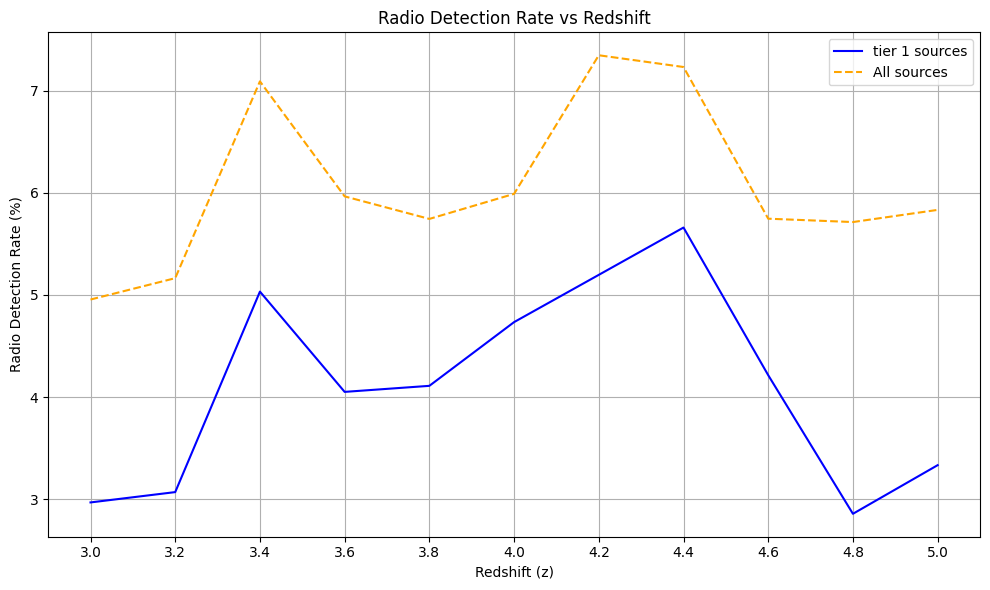

In [30]:
# make a plot for radio detection rate along different redshift bins
import matplotlib.pyplot as plt
import numpy as np
# Define redshift bins and their edges
data_bin_width = 0.2
redshift_bins = np.arange(3, 5.2, data_bin_width)
# Define the number of sources in each bin
radio_detection_rate = []
radio_detection_rate2 = []
optical_number = []
for z in redshift_bins:
    # Count sources with z in the current bin and source_tier_first = 1
    radio_count = len(df[(df['sdss_z'] >= z) &(df['z_reliable_flag'] ==1)& (df['source_tier_first'] == 1) & (df['sdss_z'] < z + data_bin_width)])
    radio_count2 = len(df[(df['sdss_z'] >= z) &(df['z_reliable_flag'] <=2)& (df['sdss_z'] < z + data_bin_width)])
    optical_count = len(df2[(source_z >= z) & (source_z < z + data_bin_width)])
    radio_rate = radio_count / optical_count if optical_count > 0 else 0
    count = radio_rate * 100  # Convert to percentage
    count2 = radio_count2 / optical_count * 100 if optical_count > 0 else 0
    radio_detection_rate.append(count)
    radio_detection_rate2.append(count2)
    optical_number.append(optical_count)
# Plotting the radio detection rate
plt.figure(figsize=(10, 6))
plt.plot(redshift_bins, radio_detection_rate, linestyle='-', color='blue', label='tier 1 sources')
plt.plot(redshift_bins, radio_detection_rate2, linestyle='--', color='orange', label='All sources')
# plt.plot(redshift_bins, optical_number, linestyle='--', color='green', label='All optical sources')
plt.title('Radio Detection Rate vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Radio Detection Rate (%)')
plt.xticks(np.arange(3, 5.2, 0.2))
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('radio_detection_rate_vs_redshift.pdf', format='pdf', dpi=300)
plt.show()

### Figure 3: the distribution of angular separation vs source_tier_flag

In [5]:
file_path = 'ref_o1r1234_all_sources.fits' 
with fits.open(file_path) as hdul:
    data = hdul[1].data
    # 创建新的字段字典，每列单独判断处理
    fixed_columns = {}
    for name in data.names:
        col = data[name]
        # 如果是数字列，就转换为本地字节序（避免 big-endian 报错）
        if np.issubdtype(col.dtype, np.number):
            fixed_columns[name] = col.byteswap().view(col.dtype.newbyteorder())
        else:
            fixed_columns[name] = col  # 字符串或 bool 列保留

    # 转换为 DataFrame
    df2 = pd.DataFrame(fixed_columns)
# 查看列名和前几行
print(df2.columns)

Index(['sdss_name', 'sdss_ra', 'sdss_dec', 'sdss_z', 'sdss_source_z',
       'sdss_z_pipe', 'sdss_zwarning', 'sdss_z_vi', 'sdss_z_conf',
       'sdss_is_qso_qn', 'sdss_z_qn', 'FIRST_r1', 'RA_deg_r1', 'DEC_deg_r1',
       'Fpeak_r1', 'Fint_r1', 'Rms_r1', 'Maj_r1', 'Min_r1', 'PA_r1',
       'Separation_first', 'GroupID_first', 'GroupSize_first',
       'GrpSize_before_first', 'group_z_min_first', 'source_tier_first',
       'NVSS_r2', 'RA_deg_r2', 'e_RAJ2000_r2', 'DEC_deg_r2', 'e_DEJ2000_r2',
       'S1.4_r2', 'e_S1.4_r2', 'MajAxis_r2', 'MinAxis_r2', 'Separation_nvss',
       'GrpSize_before_nvss', 'group_z_min_nvss', 'GroupID_nvss',
       'GroupSize_nvss', 'source_tier_nvss', 'GLEAM_r3', 'RA_deg_r3',
       'e_RAJ2000_r3', 'DEC_deg_r3', 'e_DEJ2000_r3', 'Fpwide_r3',
       'e_Fpwide_r3', 'Fintwide_r3', 'e_Fintwide_r3', 'awide_r3', 'e_awide_r3',
       'bwide_r3', 'e_bwide_r3', 'pawide_r3', 'psfawide_r3', 'psfbwide_r3',
       'psfPAwide_r3', 'Separation_gleam', 'GrpSize_before_gleam',
 

In [6]:
hz_df2=df2[df2['sdss_z'] >= 3.0]
#drop the original index of hz_df2
hz_df2.reset_index(drop=True, inplace=True)
hz_df=df[df['sdss_z'] >= 3].reset_index(drop=True)
z_reliable_flag = hz_df['z_reliable_flag']
source_tier_flag = hz_df['source_tier_flag']
# concat the two Series with the hz_df2 and form new_hz_df2
new_hz_df2 = pd.concat([hz_df2, z_reliable_flag, source_tier_flag], axis=1)
new_hz_df2 = new_hz_df2[(new_hz_df2['z_reliable_flag']==1) & (new_hz_df2['source_tier_flag'] > 0)].reset_index(drop=True)
new_hz_df2 = new_hz_df2[(new_hz_df2['source_tier_nvss']!=3) & (new_hz_df2['source_tier_gleam']!=3) & (new_hz_df2['source_tier_gleam']!=2)].reset_index(drop=True)
new_hz_df2.columns()

KeyError: 'z_reliable_flag'

/tmp/ipykernel_12805/1220296939.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


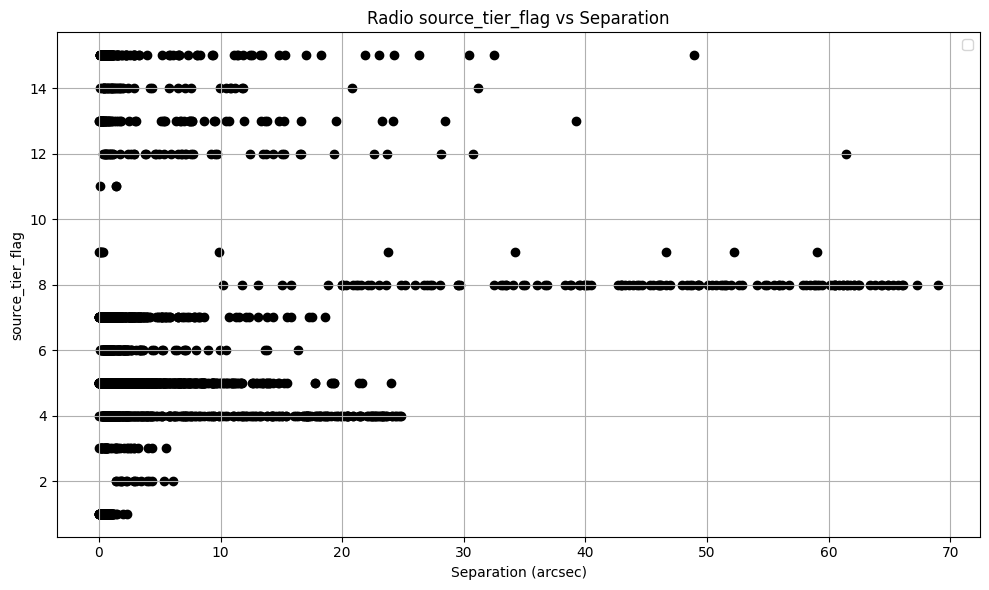

In [74]:
# Plotting the separation distribution with source_tier_flag
tier_flag = new_hz_df2['source_tier_flag']
first_sep = new_hz_df2['Separation_first']
nvss_sep = new_hz_df2['Separation_nvss']
gleam_sep = new_hz_df2['Separation_gleam']
racs_sep = new_hz_df2['Separation_racs']


plt.figure(figsize=(10, 6))
plt.scatter(first_sep, tier_flag, color='black')
plt.scatter(racs_sep, tier_flag, color='black')
plt.scatter(nvss_sep, tier_flag, color='black')
plt.scatter(gleam_sep, tier_flag, color='black')
# plt.plot(redshift_bins, radio_detection_rate2, linestyle='--', color='orange', label='All sources')
# plt.plot(redshift_bins, optical_number, linestyle='--', color='green', label='All optical sources')
plt.title('Radio source_tier_flag vs Separation')
plt.xlabel('Separation (arcsec)')
plt.ylabel('source_tier_flag')
# plt.xticks(np.arange(3, 5.2, 0.2))
# plt.yscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('source_tier_flag vs separation.pdf', format='pdf', dpi=300)
plt.show()

In [79]:
test_df=new_hz_df2[(new_hz_df2['source_tier_flag']>=12)]
test_df = test_df[['sdss_name','Separation_gleam']]
test_df.sort_values(by='Separation_gleam', ascending=True, inplace=True)
print(test_df)
# test_df.to_csv('test_df.csv', index=False)

               sdss_name  Separation_gleam
1401  011747.86+011407.6          1.179274
15    003843.98+031120.9          1.807452
1406  012812.91-053221.0          1.942228
942   135406.89-020603.2          2.161774
527   110147.88+001039.4          2.233291
...                  ...               ...
1645  134056.21+105827.4         31.207047
882   133121.81+000248.4         32.512448
221   085624.91+102017.0         39.264165
334   094113.55+114532.2         48.921996
1454  083955.38+025145.4         61.421502

[112 rows x 2 columns]


In [ ]:
import pandas as pd
from astropy.io import fits
import numpy as np
from astropy.table import Table

# tables to be concatenated
sdss_galaxy = "../catalogues/dr16_galaxy_all.fits"
dr16q_short = "tmp_sdss.fits"

with fits.open(sdss_galaxy) as hdul:
    data = hdul[1].data 
    table_g = Table(data)  
df_g = table_g.to_pandas()  
with fits.open(dr16q_short) as hdul:
    data = hdul[1].data  
    table_q = Table(data) 
df_q = table_q.to_pandas()  


In [22]:
df_q

,SDSS_NAME,RA,DEC,Z,SOURCE_Z,Z_PIPE,ZWARNING,Z_VI,Z_CONF,IS_QSO_QN,Z_QN,Z_10K,Z_CONF_10K,Z_PCA,ZWARN_PCA,class
0,000000.15+353104.2,0.000629,35.517841,0.845435,PIPE,0.845435,0,-1.000,0,1,0.844138,-1.0,-1,0.845751,0,QSO
1,000000.33+310325.3,0.001415,31.057048,2.035491,PIPE,2.035491,0,-1.000,0,1,2.026023,-1.0,-1,2.034443,0,QSO
2,000000.36+070350.8,0.001535,7.064129,1.574227,PIPE,1.574227,0,-1.000,0,1,1.565547,-1.0,-1,1.574832,0,QSO
3,000000.36+274356.2,0.001526,27.732283,1.770552,PIPE,1.770552,0,-1.000,0,1,1.774408,-1.0,-1,1.771135,0,QSO
4,000000.45+092308.2,0.001914,9.385637,2.024146,PIPE,2.024146,0,-1.000,0,1,2.033733,-1.0,-1,2.025909,0,QSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750409,235959.78+285717.0,359.999118,28.954734,2.452000,VI,2.449493,0,2.452,3,1,2.452158,-1.0,-1,2.447446,0,QSO
750410,235959.83+344315.0,359.999303,34.720842,3.109000,VI,3.114191,0,3.109,3,1,3.095621,-1.0,-1,3.106480,0,QSO
750411,235959.90+031606.9,359.999615,3.268586,1.232962,PIPE,1.232962,0,-1.000,0,1,1.239292,-1.0,-1,1.233388,0,QSO
750412,235959.94+204315.8,359.999759,20.721079,2.009865,PIPE,2.009865,0,-1.000,0,1,2.009119,-1.0,-1,2.010016,0,QSO


In [19]:
df_g

,RA,DEC,Z,ZWARNING,class,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra_hms,SDSS_NAME,dec_dms
0,23.079144,-2.809692,0.601065,0,GALAXY,22.71140,22.93285,20.77070,19.70226,19.19409,01:32:18.99,013218.99-024834.9,-02:48:34.9
1,10.037751,14.108882,0.072927,0,GALAXY,19.41224,17.24980,16.19848,15.67778,15.28349,00:40:09.06,004009.06+140632.0,+14:06:32.0
2,10.037751,14.108882,0.072995,0,GALAXY,19.41224,17.24980,16.19848,15.67778,15.28349,00:40:09.06,004009.06+140632.0,+14:06:32.0
3,10.037751,14.108882,0.072979,0,GALAXY,19.41224,17.24980,16.19848,15.67778,15.28349,00:40:09.06,004009.06+140632.0,+14:06:32.0
4,10.037751,14.108882,0.073033,0,GALAXY,19.41224,17.24980,16.19848,15.67778,15.28349,00:40:09.06,004009.06+140632.0,+14:06:32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840436,118.980060,13.262294,0.597052,0,GALAXY,22.35913,21.71739,20.53860,19.64127,19.35301,07:55:55.21,075555.21+131544.3,+13:15:44.3
2840437,119.613960,13.595149,0.544438,0,GALAXY,23.68713,22.47879,20.76031,19.77678,19.52505,07:58:27.35,075827.35+133542.5,+13:35:42.5
2840438,119.888870,10.637169,0.216728,0,GALAXY,20.58509,18.68569,17.37079,16.88546,16.55735,07:59:33.33,075933.33+103813.8,+10:38:13.8
2840439,119.762610,8.845388,0.435677,0,GALAXY,24.79886,22.04914,20.34018,19.48332,18.94810,07:59:03.03,075903.03+085043.4,+08:50:43.4


In [23]:
combined_df = pd.concat([df_q, df_g], ignore_index=True, sort=False)
combined_df

,SDSS_NAME,RA,DEC,Z,SOURCE_Z,Z_PIPE,ZWARNING,Z_VI,Z_CONF,IS_QSO_QN,...,Z_PCA,ZWARN_PCA,class,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,ra_hms,dec_dms
0,000000.15+353104.2,0.000629,35.517841,0.845435,PIPE,0.845435,0,-1.0,0.0,1.0,...,0.845751,0.0,QSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000000.33+310325.3,0.001415,31.057048,2.035491,PIPE,2.035491,0,-1.0,0.0,1.0,...,2.034443,0.0,QSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000.36+070350.8,0.001535,7.064129,1.574227,PIPE,1.574227,0,-1.0,0.0,1.0,...,1.574832,0.0,QSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000.36+274356.2,0.001526,27.732283,1.770552,PIPE,1.770552,0,-1.0,0.0,1.0,...,1.771135,0.0,QSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000.45+092308.2,0.001914,9.385637,2.024146,PIPE,2.024146,0,-1.0,0.0,1.0,...,2.025909,0.0,QSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3590850,075555.21+131544.3,118.980060,13.262294,0.597052,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,GALAXY,22.35913,21.71739,20.53860,19.64127,19.35301,07:55:55.21,+13:15:44.3
3590851,075827.35+133542.5,119.613960,13.595149,0.544438,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,GALAXY,23.68713,22.47879,20.76031,19.77678,19.52505,07:58:27.35,+13:35:42.5
3590852,075933.33+103813.8,119.888870,10.637169,0.216728,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,GALAXY,20.58509,18.68569,17.37079,16.88546,16.55735,07:59:33.33,+10:38:13.8
3590853,075903.03+085043.4,119.762610,8.845388,0.435677,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,GALAXY,24.79886,22.04914,20.34018,19.48332,18.94810,07:59:03.03,+08:50:43.4


In [24]:

combined_df_sorted = combined_df.sort_values(by='SDSS_NAME', ascending=True)
combined_df_sorted.reset_index(drop=True, inplace=True)

table_combined = Table.from_pandas(combined_df_sorted)
table_combined.write('tmp_sdss16_sorted.fits', format='fits', overwrite=True)

print(f"Saved combined table with {len(combined_df_sorted)} rows to 'combined_sdss_sorted.fits'")
print("First few rows after sorting:")
print(combined_df_sorted[['SDSS_NAME', 'RA', 'DEC', 'Z']].head())

Saved combined table with 3590855 rows to 'combined_sdss_sorted.fits'
First few rows after sorting:
            SDSS_NAME        RA        DEC         Z
0  000000.02+245408.1  0.000091  24.902252  0.555913
1  000000.08+261938.7  0.000322  26.327415  0.527359
2  000000.08-062931.0  0.000346  -6.491940  0.514150
3  000000.11+101427.9  0.000463  10.241074  0.654366
4  000000.13+345908.2  0.000559  34.985602  0.146332
